In [1]:
import datetime
import pandas as pd
import numpy as np
from yahoo_fin import stock_info as finance 
from scipy.stats import gaussian_kde, norm

closest = lambda x, strikes_list: strikes_list[min(range(len(strikes_list)), key = lambda i: abs(strikes_list[i]-x))]

In [2]:
# Get CSI and stock data and calc daily exp returns 
csi = pd.read_csv('csi_data.csv')
csi['date'] = pd.to_datetime(csi['date'])
csi.set_index('date', inplace = True)

# Create list to then calc daily returns increments
daily_returns_increments = np.arange(1, 31, 1)
daily_returns_increments = [round(x) for x in daily_returns_increments]

# Grab historical stock data and 
start_date = '20150101'
end_date = datetime.datetime.today().date().strftime('%Y%m%d')
ticker_data = finance.get_data('SPY', start_date, end_date)
underlying_price = finance.get_data('SPY', start_date, end_date)['close'].iloc[-1]

# Fill in weekends using pandas' ffill
start_date = ticker_data.index[0]
end_date = ticker_data.index[-1]
# New index encompassing all days (including weekends)
new_idx = pd.date_range(start_date, end_date)
new_df = pd.DataFrame(index = new_idx, columns = ticker_data.columns)
# Fill in data to new dataframe
for col in new_df.columns:
    new_df[col] = ticker_data[col]
# Overright original dataframe with values from new_df
ticker_data = new_df.fillna(method = 'ffill')

# Add in daily returns for future time durations
for qty in daily_returns_increments:
    ticker_data[qty] = ticker_data['close'].pct_change(qty).shift(-qty)

# Filter out any data more recent than class' end_date to prevent data leakage
#ticker_data = ticker_data.loc[:pd.to_datetime(csi_start)]
ticker_data = ticker_data.dropna()

In [3]:
ticker_data

,open,high,low,close,adjclose,volume,ticker,1,2,3,...,21,22,23,24,25,26,27,28,29,30
2015-01-02,206.380005,206.880005,204.179993,205.429993,182.149979,121465900.0,SPY,0.000000,0.000000,-0.018060,...,-0.002239,-0.002239,-0.002239,0.000097,-0.013094,-0.025751,-0.016745,-0.029110,-0.029110,-0.029110
2015-01-03,206.380005,206.880005,204.179993,205.429993,182.149979,121465900.0,SPY,0.000000,-0.018060,-0.027309,...,-0.002239,-0.002239,0.000097,-0.013094,-0.025751,-0.016745,-0.029110,-0.029110,-0.029110,-0.017086
2015-01-04,206.380005,206.880005,204.179993,205.429993,182.149979,121465900.0,SPY,-0.018060,-0.027309,-0.015188,...,-0.002239,0.000097,-0.013094,-0.025751,-0.016745,-0.029110,-0.029110,-0.029110,-0.017086,-0.002872
2015-01-05,204.169998,204.369995,201.350006,201.720001,178.860443,169632600.0,SPY,-0.009419,0.002925,0.020722,...,0.018491,0.005057,-0.007833,0.001339,-0.011253,-0.011253,-0.011253,0.000991,0.015467,0.011600
2015-01-06,202.089996,202.720001,198.860001,199.820007,177.175781,209151400.0,SPY,0.012461,0.030427,0.022170,...,0.014613,0.001601,0.010860,-0.001852,-0.001852,-0.001852,0.010509,0.025123,0.021219,0.031528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-17,394.529999,398.119995,393.299988,397.260010,395.963135,91822000.0,SPY,-0.014550,-0.019584,-0.019584,...,0.023486,0.028344,0.035820,0.035820,0.035820,0.036198,0.039269,0.035720,0.046846,0.050345
2021-03-18,394.480011,396.720001,390.750000,391.480011,390.201996,115112500.0,SPY,-0.005109,-0.005109,-0.005109,...,0.043527,0.051114,0.051114,0.051114,0.051497,0.054613,0.051012,0.062302,0.065853,0.065853
2021-03-19,389.880005,391.570007,387.149994,389.480011,389.480011,112777800.0,SPY,0.000000,0.000000,0.007985,...,0.056511,0.056511,0.056511,0.056896,0.060029,0.056409,0.067757,0.071326,0.071326,0.071326
2021-03-20,389.880005,391.570007,387.149994,389.480011,389.480011,112777800.0,SPY,0.000000,0.007985,0.000051,...,0.056511,0.056511,0.056896,0.060029,0.056409,0.067757,0.071326,0.071326,0.071326,0.066062


In [11]:
X = np.arange(-.05, .05, .001)
likelihood_cutoff_upper = .667
likelihood_cutoff_lower = 1 - likelihood_cutoff_upper 

results = pd.DataFrame()
todays_date = datetime.datetime.today().date()
results.at[todays_date, 'upper'] = underlying_price
results.at[todays_date, 'lower'] = underlying_price

idx = csi[csi['quadrant'] == 'Q1'].index

for i in range(1, 31, 1):
    #i = round(i)
    
    # Predictions    
    data = ticker_data[i].reindex(idx).dropna().values
    g = gaussian_kde(data)
    l = [g.integrate_box_1d(-np.inf, x) for x in X]
    l2 = [g.integrate_box_1d(x, np.inf) for x in X]
    
    
    # Calculate upper and lower move for each
    # CSI
    upper_move = 1 + round(X[l.index(closest(likelihood_cutoff_upper, l))], 6)
    lower_move = 1 - round(X[l2.index(closest(likelihood_cutoff_lower, l2))], 6)

    
    # Calculate date for the index
    date_idx = todays_date + datetime.timedelta(days = i)
    
    # Save results 
    results.at[date_idx, 'upper'] = underlying_price * upper_move
    results.at[date_idx, 'lower'] = underlying_price * lower_move

In [12]:
results

,upper,lower
2021-04-21,412.170013,412.170013
2021-04-22,412.994353,411.345673
2021-04-23,413.406523,410.933503
2021-04-24,414.230863,410.109163
2021-04-25,414.643034,409.696993
2021-04-26,414.643034,409.696993
2021-04-27,415.055204,409.284823
2021-04-28,415.467374,408.872653
2021-04-29,415.879544,408.460483
2021-04-30,416.291714,408.048313


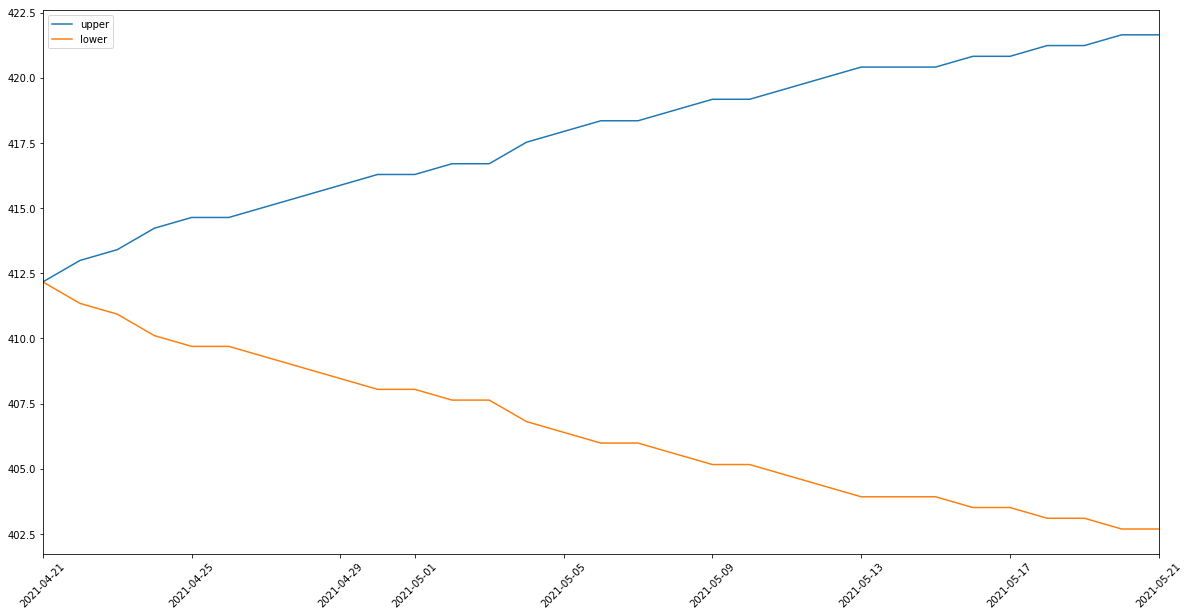

In [13]:
results.plot(rot = 45, figsize = (20, 10))


In [14]:
results.to_csv('results.csv')